/Users/idrees/Code/Avalanche_Research/subnet-simulation-engine/analysis
['/Users/idrees/Code/Avalanche_Research/subnet-simulation-engine', '/Users/idrees/Code/Avalanche_Research/subnet-simulation-engine', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/opt/homebrew/Cellar/python@3.9/3.9.19_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/idrees/Code/Avalanche_Research/subnet_venv/lib/python3.9/site-packages']
Loaded configuration: {'transaction_throughput_params': {'base_throughput': 1000}, 'block_size_params': {'base_block_size': 1, 'block_interval': 10, 'network_bandwidth': 100}, 'consensus_params': {'type': 'PoS', 'efficiency': 0.9}, 'latency_params': {'base_latency': 100, 'geographical_factor': 1.2}, 'topology_params': {'type': 'fully_connected'}, 'fault_tolerance_params': {'base_fault_tolerance'

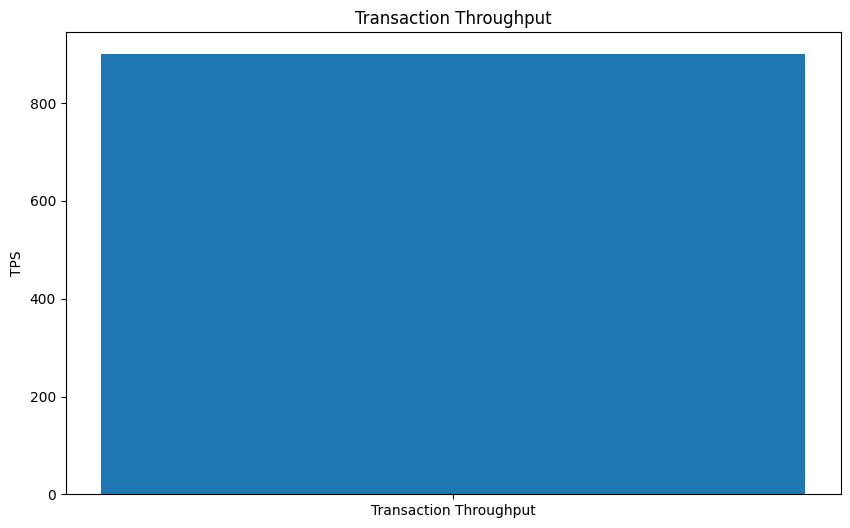

In [2]:
# Step 1: Import necessary modules and classes
import sys
import os
import json
import matplotlib.pyplot as plt

# Print the current working directory to confirm
print(os.getcwd())

# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

# Verify the new system path
print(sys.path)

from simulation_engine.config.config_manager import ConfigManager
from simulation_engine.core.network_architecture_model import NetworkArchitectureModel

# Step 2: Define ConfigManager class
class ConfigManager:
    @staticmethod
    def load_config(file_path):
        with open(file_path, 'r') as file:
            config = json.load(file)
        print("Loaded configuration:", config)  # Add this line for debugging
        return config

# Step 3: Load configuration
# Adjust the file path as needed based on your current working directory
config_file = '../examples/example_network_architecture_config.json'
config = ConfigManager.load_config(config_file)

# Step 4: Run Network Architecture Simulation
network_model = NetworkArchitectureModel(
    config['transaction_throughput_params'],
    config['block_size_params'],
    config['consensus_params'],
    config['latency_params'],
    config['topology_params'],
    config['fault_tolerance_params']
)

network_architecture = network_model.simulate_network_architecture()

# Step 5: Extract data for analysis and visualization
transaction_throughput = network_architecture['transaction_throughput']
block_size_info = network_architecture['block_size_info']
consensus_info = network_architecture['consensus_info']
latency = network_architecture['latency']
topology_info = network_architecture['topology_info']
fault_tolerance = network_architecture['fault_tolerance']

# Combine data for plotting and analysis
plot_data = {
    'transaction_throughput': transaction_throughput,
    'block_size': block_size_info['block_size'],
    'propagation_delay': block_size_info['propagation_delay'],
    'consensus_security': consensus_info['security'],
    'consensus_decentralization': consensus_info['decentralization'],
    'latency': latency,
    'topology_fault_tolerance': topology_info['fault_tolerance'],
    'topology_efficiency': topology_info['efficiency'],
    'fault_tolerance': fault_tolerance
}

# Step 6: Visualize the results (you can plot this data similar to the methods we've used before)

# Example visualization of transaction throughput
plt.figure(figsize=(10, 6))
plt.bar(['Transaction Throughput'], [transaction_throughput], color='#1f77b4')
plt.title('Transaction Throughput')
plt.ylabel('TPS')
plt.show()

# Additional visualizations can be added similarly for other parameters...
